# Imports/Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Collect/Clean Data

[Temperature data source](https://www.nasa.gov/stem-content/global-land-ocean-temperature-index-data-set/)

[Hurricane/Cyclone data source](https://public.emdat.be/data)

In [2]:
# read in storm and temperature data

temp = pd.read_excel('global-land-oceantempindex.xlsx') 
storms = pd.read_excel('tropical_storms.xlsx')

In [3]:
# clean temp dataframe

temp = temp.iloc[:,:3]
temp.columns = ['year', 'temp', 'smoothed_temp']
temp = temp[temp['year'] >= 1900].reset_index(drop=True)
temp.head()

,year,temp,smoothed_temp
0,1900,-0.08,-0.20
1,1901,-0.15,-0.23
2,1902,-0.28,-0.26
3,1903,-0.37,-0.28
4,1904,-0.47,-0.31


In [4]:
# clean storm dataframe

storms = storms[['End Year', 'Event Name', 'Country', 'Magnitude', 'Magnitude Scale',
                 'Total Deaths', "Total Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)"]]
storms.columns = ['year', 'name', 'country', 'magnitude', 'magnitude_scale', 'deaths', 'damage_adj', 'damage']
storms['name'] = storms['name'].fillna('not named')
storms.head()

,year,name,country,magnitude,magnitude_scale,deaths,damage_adj,damage
0,1900,not named,United States of America,220.0,Kph,6000.0,1055280.0,30000.0
1,1902,not named,Myanmar,NaN,Kph,600.0,NaN,NaN
2,1903,not named,Jamaica,NaN,Kph,65.0,NaN,NaN
3,1904,not named,Bangladesh,NaN,Kph,NaN,NaN,NaN
4,1905,not named,Philippines,NaN,Kph,240.0,NaN,NaN


# Create Visualizations

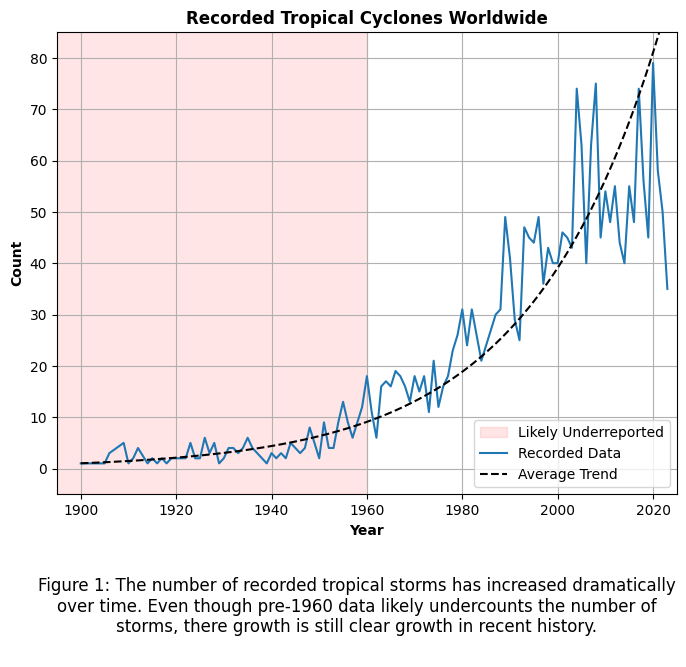

In [5]:
# create plot of number of tropical storms over time

fig, ax = plt.subplots(figsize=(8,6)) 

# get data
plt_data = storms[['year', 'name']].groupby(by='year').count().reset_index()

# fit trend
x = plt_data.year
log_y = np.log(plt_data.name)
fit = np.polyfit(x, log_y, 1)
fit_y = np.exp(plt_data.year * fit[0]) * np.exp(fit[1])

# plot figure
rect = plt.Rectangle((1880, -5), 80, 100, fill=True, color='r', alpha=0.1, label='Likely Underreported')
ax.add_patch(rect)
ax.plot(plt_data.year, plt_data.name, label='Recorded Data')
ax.plot(plt_data.year, fit_y, label='Average Trend', color='black', ls='--')

plt.title('Recorded Tropical Cyclones Worldwide', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlim(1895, 2025)
plt.ylim(-5, 85)

plt.legend()
plt.grid()

caption = '''
Figure 1: The number of recorded tropical storms has increased dramatically
over time. Even though pre-1960 data likely undercounts the number of
storms, there growth is still clear growth in recent history.
'''
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

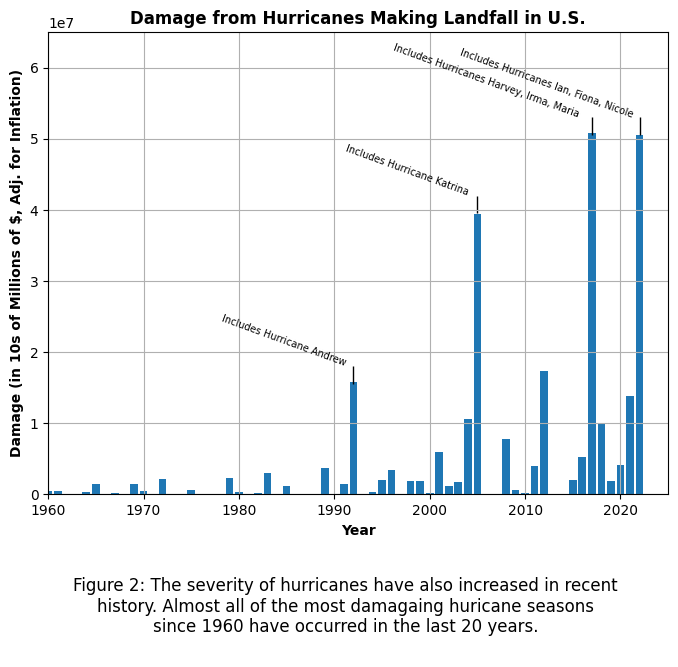

In [6]:
# create plot of severity of tropical storms over time

fig, ax = plt.subplots(figsize=(8,6)) 

# get data
plt_data = storms[storms['country']=='United States of America']
plt_data = plt_data[['year', 'damage']].dropna()
plt_data = plt_data[plt_data.year >= 1960]
plt_data = plt_data.groupby(by='year').mean().reset_index()


# plot figure
ax.bar(plt_data.year, plt_data.damage)

plt.title('Damage from Hurricanes Making Landfall in U.S.', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Damage (in 10s of Millions of $, Adj. for Inflation)', fontweight='bold')

plt.text(1978, 18000000, 'Includes Hurricane Andrew', fontsize=7, rotation=-20)
plt.arrow(1992,18000000, 0, -2500000)

plt.text(1991, 42000000, 'Includes Hurricane Katrina', fontsize=7, rotation=-20)
plt.arrow(2005,42000000, 0, -2500000)

plt.text(1996, 53000000, 'Includes Hurricanes Harvey, Irma, Maria', fontsize=7, rotation=-20)
plt.arrow(2017,53000000, 0, -2500000)


plt.text(2003, 53000000, 'Includes Hurricanes Ian, Fiona, Nicole', fontsize=7, rotation=-20)
plt.arrow(2022,53000000, 0, -2500000)
plt.ylim(0, 65000000)
plt.xlim(1960, 2025)
plt.grid()

caption = '''
Figure 2: The severity of hurricanes have also increased in recent 
history. Almost all of the most damagaing huricane seasons 
since 1960 have occurred in the last 20 years. 
'''
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

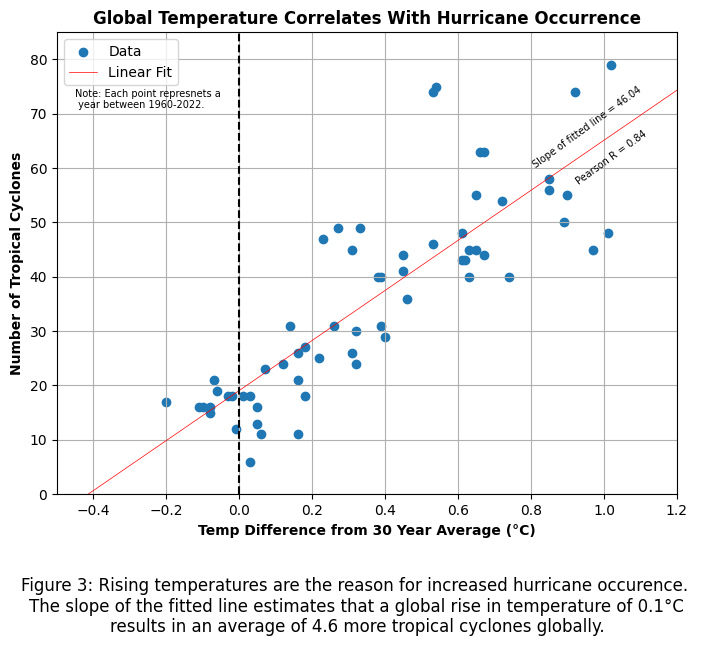

In [7]:
# create plot showing correlation of temperature and hurricanes

fig, ax = plt.subplots(figsize=(8,6)) 

# get data
plt_data = storms[['year', 'name']].groupby(by='year').count().reset_index()
plt_data = pd.merge(plt_data, temp, how='left', on ='year').dropna()
plt_data = plt_data[plt_data.year >= 1960]

fit = np.polyfit(plt_data.temp, plt_data.name, 1)
xs = np.arange(-1.5,1.5, 0.1)
y_fit = xs * fit[0] + fit[1]
r = round(np.corrcoef(plt_data.temp, plt_data.name)[0][1], 2)

# plot figure
ax.scatter(plt_data.temp, plt_data.name, label='Data')
ax.plot(xs, y_fit, color='red', lw=0.5, label='Linear Fit')
ax.axvline(0, color='black', ls='--')

plt.title('Global Temperature Correlates With Hurricane Occurrence', fontweight='bold')
plt.xlabel('Temp Difference from 30 Year Average (°C)', fontweight='bold')
plt.ylabel('Number of Tropical Cyclones', fontweight='bold')

m = round(fit[0], 2)
plt.text(0.8, 60, f'Slope of fitted line = {m}', fontsize=7, rotation=36)
plt.text(-.45, 71, 'Note: Each point represnets a \n year between 1960-2022.', fontsize=7)
plt.text(0.92, 57, f'Pearson R = {r}', fontsize=7, rotation = 36)
plt.ylim(0, 85)
plt.xlim(-0.5, 1.2)
plt.grid()
plt.legend()

caption = '''
Figure 3: Rising temperatures are the reason for increased hurricane occurence. 
The slope of the fitted line estimates that a global rise in temperature of 0.1°C
results in an average of 4.6 more tropical cyclones globally.
'''
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

![](hurricane_sandy_damage.jpeg)

<b>Figure 4:</b> Damage caused by Hurricane Sandy when it made landfall in New York in 2012. Occurrences like this will happen more frequently as global temperatures continue to rise. Source: National Geographic.